## Import packages

In [2]:
import pandas as pd  # Data handling  
import numpy as np  # Numerical operations  
import tensorflow as tf  # Deep learning framework  
from tensorflow import keras  # High-level API for TensorFlow  

import matplotlib.pyplot as plt  # Visualization  

## Get the data

In [4]:
# Load training data from directory  
train_data = keras.utils.image_dataset_from_directory(  
    directory='/kaggle/input/dogs-vs-cats/train',  
    labels="inferred", 
    label_mode="int", 
    color_mode="rgb", 
    batch_size=32,  
    image_size=(256, 256) 
)  

# Load test data from directory  
test_data = keras.utils.image_dataset_from_directory(  
    directory='/kaggle/input/dogs-vs-cats/test',  
    labels="inferred",  
    label_mode="int",  
    color_mode="rgb",  
    batch_size=32,  
    image_size=(256, 256)  
)  


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalize

In [5]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize pixel values to [0,1]  
    return image, label  

# Apply preprocessing to datasets  
train_data = train_data.map(process)  
test_data = test_data.map(process)  


## Modeling

In [12]:
model = keras.Sequential()  # Initialize a sequential model  

# Convolutional Layer 1  
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))  
model.add(keras.layers.BatchNormalization())  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))  

# Convolutional Layer 2  
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))  
model.add(keras.layers.BatchNormalization())  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))  

# Convolutional Layer 3  
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))  
model.add(keras.layers.BatchNormalization())  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))  

# Flatten feature maps  
model.add(keras.layers.GlobalAveragePooling2D())  

# Fully Connected Layers  
model.add(keras.layers.Dense(128, activation='relu'))  
model.add(keras.layers.BatchNormalization())  

model.add(keras.layers.Dense(64, activation='relu'))  
model.add(keras.layers.BatchNormalization())  

model.add(keras.layers.Dense(32, activation='relu'))  
model.add(keras.layers.BatchNormalization())  
model.add(keras.layers.Dropout(0.3))  # Reduce overfitting  

# Output Layer (Binary Classification)  
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification  


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              

 Total params: 121,921 (476.25 KB)

 Trainable params: 121,025 (472.75 KB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
model.compile(
    optimizer= keras.optimizers.Adam(),
    loss= keras.losses.BinaryCrossentropy(),
    metrics= ['accuracy']
)

In [15]:
# early stopping
early_stopping= keras.callbacks.EarlyStopping(
    monitor= 'val_loss',
    min_delta= 0.001,
    patience= 25,
    verbose= 1,
    restore_best_weights= True
)

In [16]:
# fit
history= model.fit(train_data, epochs= 15, validation_data= test_data, callbacks= early_stopping)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.5844 - loss: 0.7254 - val_accuracy: 0.5378 - val_loss: 0.7461
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.6485 - loss: 0.6222 - val_accuracy: 0.6194 - val_loss: 0.6572
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.7021 - loss: 0.5725 - val_accuracy: 0.7158 - val_loss: 0.5463
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.7193 - loss: 0.5456 - val_accuracy: 0.7446 - val_loss: 0.5203
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7482 - loss: 0.5162 - val_accuracy: 0.7422 - val_loss: 0.5235
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7683 - loss: 0.4840 - val_accuracy: 0.6186 - val_loss: 1.0214
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8006 - loss: 0.4433 - val_accuracy: 0.8022 - val_loss: 0.4367
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8241 - loss: 0.3917 - 

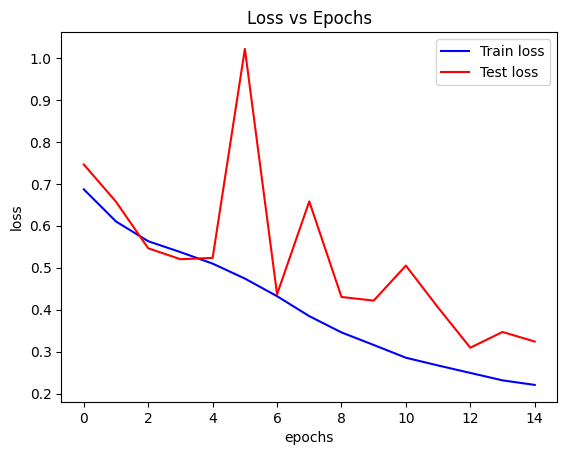

In [17]:
# plot loss
plt.plot(history.history['loss'], color= 'blue', label= 'Train loss')
plt.plot(history.history['val_loss'], color= 'red', label= 'Test loss')
plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

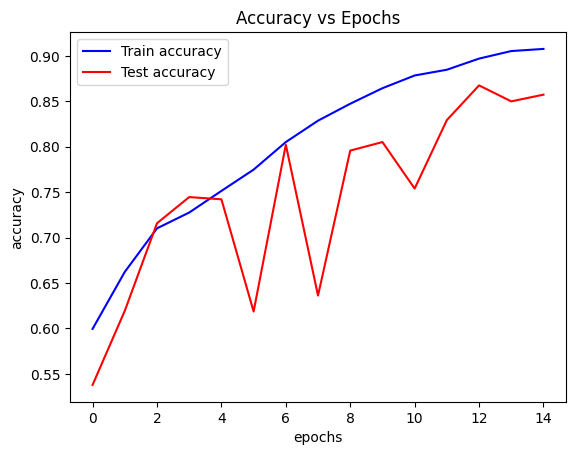

In [18]:
# plot accuracy
plt.plot(history.history['accuracy'], color= 'blue', label= 'Train accuracy')
plt.plot(history.history['val_accuracy'], color= 'red', label= 'Test accuracy')
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

<img src='https://res.cloudinary.com/dweog6wkb/image/upload/v1737033154/Insta_posts_20_gijufu.png' width= '70%' ></img>